In [1]:
# install packages if necessary
#
#!pip install matplotlib seaborn tabulate pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install tabulate
##!pip install pandas

## Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [2]:
"""
import pandas as pd

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)

# Load the datasets
def get_dataset():
    merged_df1 = pd.read_csv('../databases/2018/student2018.csv')
    merged_df2 = pd.read_csv('../databases/2018/only_teacher2018.csv')
    merged_df1.merge(merged_df2, on=['CNT', 'CNTSCHID'], how='inner')
    return merged_df1

# Save the merged dataset to a CSV file
teacher_student = get_dataset()
teacher_student.to_csv('../databases/2018/teacher_student2018.csv', index=False)


"""

'\nimport pandas as pd\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)\n\n# Load the datasets\ndef get_dataset():\n    merged_df1 = pd.read_csv(\'../databases/2018/student2018.csv\')\n    merged_df2 = pd.read_csv(\'../databases/2018/only_teacher2018.csv\')\n    merged_df1.merge(merged_df2, on=[\'CNT\', \'CNTSCHID\'], how=\'inner\')\n    return merged_df1\n\n# Save the merged dataset to a CSV file\nteacher_student = get_dataset()\nteacher_student.to_csv(\'../databases/2018/teacher_student2018.csv\', index=False)\n\n\n'

The teacher dataset does not have the information for the student's performance, we need to join them based on `CNT` and `CNTSCHID` columns (according to https://www.oecd.org/en/about/programmes/pisa/how-to-prepare-and-analyse-the-pisa-database.html)

In [3]:
"""
columns_to_keep = [
'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ',
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH',
'CNT', 'CNTSCHID', 'REPEAT', 'ST001D01T', 'CNTSTUID'
]

# Function to load and merge datasets in chunks
def init_target_csv():
    with open("../databases/2018/teacher_student2018.csv", 'w') as file:
        pass # Do nothing, just open and close the file

    df1 = pd.read_csv('../databases/2018/student2018.csv', nrows=10)
    df2 = pd.read_csv('../databases/2018/only_teacher2018.csv', nrows=10)

    df1 = df1[columns_to_keep]

    df_result = pd.DataFrame(columns=(df1.columns.append(df2.columns)).unique())
    df_result.to_csv("../databases/2018/teacher_student2018.csv", index_label=False)

# Function to load and merge datasets in chunks
def get_dataset_in_chunks(chunk_size):
    chunks = []
    i=0
    for chunk in pd.read_csv('../databases/2018/student2018.csv', chunksize=chunk_size):
        i=i+1
        print("i=",i,flush=True)
        chunk = chunk[columns_to_keep]

        merged_chunk = pd.merge(chunk, pd.read_csv('../databases/2018/only_teacher2018.csv'), on=['CNT', 'CNTSCHID'])
        merged_chunk.to_csv("../databases/2018/teacher_student2018.csv", mode="a", header=False, index=False)
        #print(merged_chunk.head(), flush=True)
        #chunks.append(merged_chunk)
    #return pd.concat(chunks, ignore_index=True)

# Define the chunk size
chunk_size = 50000 # Adjust the chunk size based on your memory capacity

init_target_csv()
# Perform the merge in chunks
get_dataset_in_chunks(chunk_size)

print("Merge completed and saved to 'teacher_student2018.csv'.")

"""

'\ncolumns_to_keep = [\n\'PV1READ\', \'PV2READ\', \'PV3READ\', \'PV4READ\', \'PV5READ\', \'PV6READ\', \'PV7READ\', \'PV8READ\', \'PV9READ\', \'PV10READ\',\n\'PV1SCIE\', \'PV2SCIE\', \'PV3SCIE\', \'PV4SCIE\', \'PV5SCIE\', \'PV6SCIE\', \'PV7SCIE\', \'PV8SCIE\', \'PV9SCIE\', \'PV10SCIE\',\n\'PV1MATH\', \'PV2MATH\', \'PV3MATH\', \'PV4MATH\', \'PV5MATH\', \'PV6MATH\', \'PV7MATH\', \'PV8MATH\', \'PV9MATH\', \'PV10MATH\',\n\'CNT\', \'CNTSCHID\', \'REPEAT\', \'ST001D01T\', \'CNTSTUID\'\n]\n\n# Function to load and merge datasets in chunks\ndef init_target_csv():\n    with open("../databases/2018/teacher_student2018.csv", \'w\') as file:\n        pass # Do nothing, just open and close the file\n\n    df1 = pd.read_csv(\'../databases/2018/student2018.csv\', nrows=10)\n    df2 = pd.read_csv(\'../databases/2018/only_teacher2018.csv\', nrows=10)\n\n    df1 = df1[columns_to_keep]\n\n    df_result = pd.DataFrame(columns=(df1.columns.append(df2.columns)).unique())\n    df_result.to_csv("../databases/2

In [4]:
import pandas as pd

#teacher = pd.read_csv('../../../databases/2018/teacher_student2018.csv', nrows=1000)
teacher = pd.read_csv('../../../databases/2018/teacher_student2018.csv')
#teacher = pd.read_csv('../../../databases/2018/only_teacher2018.csv')

["b'ALB'" "b'QAZ'" "b'BRA'" "b'CHL'" "b'TAP'" "b'DOM'" "b'DEU'" "b'HKG'"
 "b'KOR'" "b'MAC'" "b'MYS'" "b'MAR'" "b'PAN'" "b'PER'" "b'PRT'" "b'ESP'"
 "b'ARE'" "b'GBR'" "b'USA'"]**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

## **2.2 Describe Data**

The original dataset has 383 features

In [5]:
teacher.head(5)

,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,...,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,VER_DAT
0,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,1.4070,NaN,NaN,1.2332,1.8008,-1.9057,1.9399,1.685,112.895,b' 09MAY19:11:21:10'
1,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-2.0538,NaN,NaN,-0.8666,0.7804,1.1250,-0.8779,1.685,112.895,b' 09MAY19:11:21:10'
2,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.6053,NaN,NaN,-0.8666,0.1156,-1.0293,1.4706,1.685,112.895,b' 09MAY19:11:21:10'
3,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.3288,NaN,NaN,-0.2584,-0.0788,1.1250,1.9399,1.685,112.895,b' 09MAY19:11:21:10'
4,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.6433,NaN,NaN,0.4987,-1.3236,-1.9772,-0.6635,1.685,112.895,b' 09MAY19:11:21:10'


In [6]:
teacher.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456667 entries, 0 to 3456666
Data columns (total 383 columns):
 #    Column            Non-Null Count    Dtype  
---   ------            --------------    -----  
 0    PV1READ           3456667 non-null  float64
 1    PV2READ           3456667 non-null  float64
 2    PV3READ           3456667 non-null  float64
 3    PV4READ           3456667 non-null  float64
 4    PV5READ           3456667 non-null  float64
 5    PV6READ           3456667 non-null  float64
 6    PV7READ           3456667 non-null  float64
 7    PV8READ           3456667 non-null  float64
 8    PV9READ           3456667 non-null  float64
 9    PV10READ          3456667 non-null  float64
 10   PV1SCIE           3456667 non-null  float64
 11   PV2SCIE           3456667 non-null  float64
 12   PV3SCIE           3456667 non-null  float64
 13   PV4SCIE           3456667 non-null  float64
 14   PV5SCIE           3456667 non-null  float64
 15   PV6SCIE           3456667 non-

Decode keys

In [7]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/teacher_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTTCHID: Intl. Teacher ID
TEACHERID: Teacher identification code
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
Region: Region
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST: Language of Questionnaire/Assessment
TC001Q01NA: Are you female or male?
TC002Q01NA: How old are you?
TC005Q01NA: What is your current employment status as a teacher? My employment status at this school
TC007Q01NA: How many years of work experience do you have? Year(s) working as a teacher at this school
TC007Q02NA: How many years of work experience do you have? Year(s) working as a teacher in total
TC014Q01HA: Did you complete a teacher education or training programme?
TC015Q01NA: How d

The dataset is composed by 376 numeric columns and only 7 categorical columns (this data includes the plausible values from the student dataset, these are 30 columns, so the composed numeric columns would be 345 for the teacher dataset).

In [8]:
import pandas as pd
from tabulate import tabulate

categorical_columns = teacher.select_dtypes(include=["object", "category"]).columns
numeric_columns = teacher.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
        "Column names": [
            ", ".join(numeric_columns),
            ", ".join(categorical_columns),
        ],
    }
)

print(
    tabulate(
        column_types_df,
        headers="keys",
        tablefmt="pretty",
        showindex=False,
        colalign=("left", "left", "left"),
    )
)

+-------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
teacher.describe()

,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,...,TCDIRINS,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
count,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,...,940074.000000,2.004156e+06,940436.000000,940327.000000,1.647573e+06,1.872198e+06,1.722351e+06,1.719565e+06,3.456667e+06,3.456667e+06
mean,4.636025e+02,4.632927e+02,4.633980e+02,4.635756e+02,4.635697e+02,4.636905e+02,4.636093e+02,4.632991e+02,4.635908e+02,4.634948e+02,...,0.101403,1.406355e-01,-0.010801,0.107759,-1.785209e-01,1.703546e-01,6.979644e-03,1.025862e-01,1.396002e+01,1.685024e+03
std,1.078011e+02,1.075389e+02,1.074769e+02,1.077889e+02,1.075411e+02,1.076631e+02,1.077193e+02,1.075199e+02,1.076738e+02,1.078125e+02,...,1.052418,1.013975e+00,1.050670,1.001775,1.073932e+00,1.082582e+00,9.421960e-01,1.008239e+00,3.183776e+01,4.156289e+03
min,8.405000e+01,1.097850e+02,6.862900e+01,8.527900e+01,8.794300e+01,9.201700e+01,9.804200e+01,1.000830e+02,8.688500e+01,8.743200e+01,...,-3.935500,-3.212900e+00,-4.309800,-3.612100,-4.280200e+00,-1.341300e+00,-2.716000e+00,-2.497200e+00,8.635400e-01,1.000000e+00
25%,3.855260e+02,3.857830e+02,3.859200e+02,3.858640e+02,3.860790e+02,3.857500e+02,3.858270e+02,3.854810e+02,3.862235e+02,3.858580e+02,...,-0.794400,-5.720000e-01,-0.692300,-0.557100,-8.666000e-01,-4.411000e-01,-5.511000e-01,-2.634000e-01,1.124050e+00,1.474965e+02
50%,4.646620e+02,4.643560e+02,4.649120e+02,4.643890e+02,4.646280e+02,4.647290e+02,4.646740e+02,4.646380e+02,4.644400e+02,4.643590e+02,...,0.165900,1.974000e-01,-0.121500,-0.104500,-2.584000e-01,1.156000e-01,-1.151000e-01,-2.634000e-01,3.505500e+00,3.869283e+02
75%,5.420080e+02,5.417905e+02,5.413520e+02,5.421100e+02,5.418770e+02,5.420190e+02,5.421770e+02,5.416780e+02,5.420500e+02,5.420880e+02,...,1.359600,8.303000e-01,0.635700,0.874400,6.596000e-01,1.075900e+00,1.125000e+00,9.196000e-01,1.327657e+01,1.788914e+03
max,8.688700e+02,8.984780e+02,8.616130e+02,8.737880e+02,8.578580e+02,8.655240e+02,8.419780e+02,9.286870e+02,8.412210e+02,8.645570e+02,...,1.365600,1.854200e+00,2.453300,1.610100,1.302600e+00,1.800800e+00,1.125000e+00,1.943600e+00,1.294020e+03,4.934358e+04


The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.

In [10]:
"""
Setup average reading scores
"""

from columns_list_q2 import (
    reading_columns,
    get_avg_results,
    drop_columns
)

teacher = get_avg_results(teacher, reading_columns, "Reading", None)

teacher = drop_columns(teacher)
teacher["Avg Reading Result"].describe()

count    3.456667e+06
mean     4.635123e+02
std      1.047913e+02
min      1.466820e+02
25%      3.869585e+02
50%      4.650101e+02
75%      5.414968e+02
max      8.164406e+02
Name: Avg Reading Result, dtype: float64

## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?


In [11]:
# Group by teacher (CNTTCHID) with students performance aggregated
summary = teacher.groupby('CNTTCHID').agg(
    total_students=('CNTSTUID', 'count'),
    repeating_students=('REPEAT', 'sum'),
    highest_score=('Avg Reading Result', 'max'),
    lowest_score=('Avg Reading Result', 'min'),
    average_score=('Avg Reading Result', 'mean')
).reset_index()

summary['percentage_repeating'] = (summary['repeating_students'] / summary['total_students']) * 100

# Merge statistics back into the original DataFrame
teacher = teacher.merge(
    summary[[
        'CNTTCHID',
        'percentage_repeating',
        'total_students',
        'repeating_students',
        'highest_score',
        'lowest_score',
        'average_score'
    ]],
    on='CNTTCHID', how='left')

# Display the result
print(summary)


          CNTTCHID  total_students  repeating_students  highest_score  \
0         800001.0              27                 1.0       515.1454   
1         800002.0               2                 0.0       442.8525   
2         800003.0              24                 0.0       539.8331   
3         800004.0               3                 0.0       447.7255   
4         800005.0              31                 0.0       657.9488   
...            ...             ...                 ...            ...   
107362  84003775.0              24                 4.0       697.3554   
107363  84003776.0              23                 0.0       771.9007   
107364  84003777.0              37                 2.0       714.3257   
107365  84003778.0              30                 1.0       697.0801   
107366  84003779.0              32                 1.0       681.0547   

        lowest_score  average_score  percentage_repeating  
0           293.6978     395.693496              3.703704  
1  

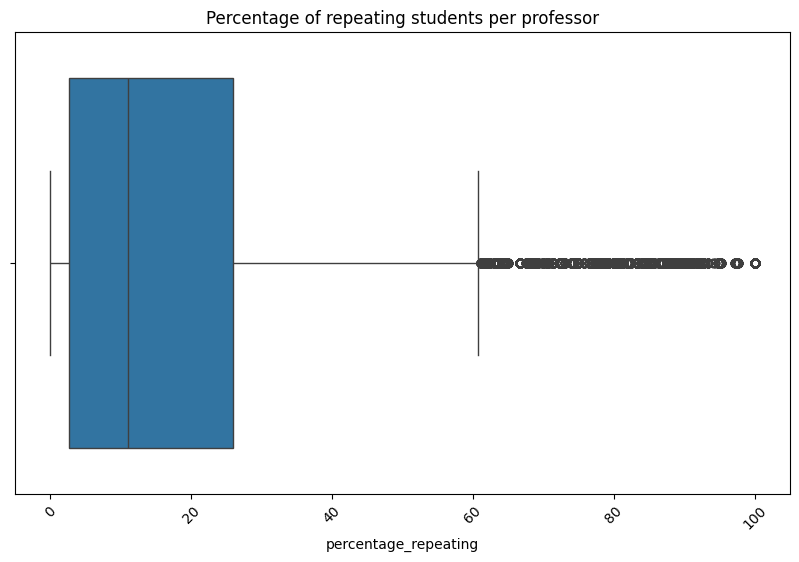

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='percentage_repeating', data=summary)
plt.title("Percentage of repeating students per professor")
plt.xlabel("percentage_repeating")
plt.xticks(rotation=45)
plt.show()

#del summary

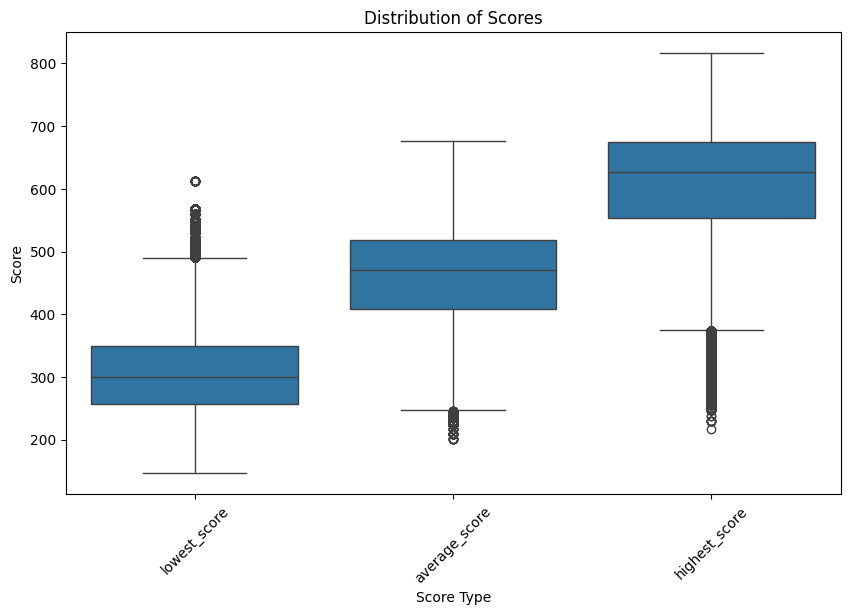

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summary_long = teacher.melt(
    id_vars=['CNTTCHID'],
    value_vars=['lowest_score', 'average_score', 'highest_score'],
    var_name='Score Type',
    value_name='Score'
)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score Type', y='Score', data=summary_long)
plt.title("Distribution of Scores")
plt.xlabel("Score Type")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

#del summary

**List of countries**:
teacher dataset only has these countries (so we should remove all students from other countries):
`ALB`, `QAZ`, `BRA`, `CHL`, `TAP`, `DOM`, `DEU`, `HKG`, `KOR`, `MAC`,`MYS`,`MAR`,`PAN`,`PER`,`PRT`,`ESP`,`ARE`,`GBR`,`USA`

In [14]:
# Print the list of unique countries from the 'CNT' column
print(teacher['CNT'].unique())

["b'ALB'" "b'QAZ'" "b'BRA'" "b'CHL'" "b'TAP'" "b'DOM'" "b'DEU'" "b'HKG'"
 "b'KOR'" "b'MAC'" "b'MYS'" "b'MAR'" "b'PAN'" "b'PER'" "b'PRT'" "b'ESP'"
 "b'ARE'" "b'GBR'" "b'USA'"]


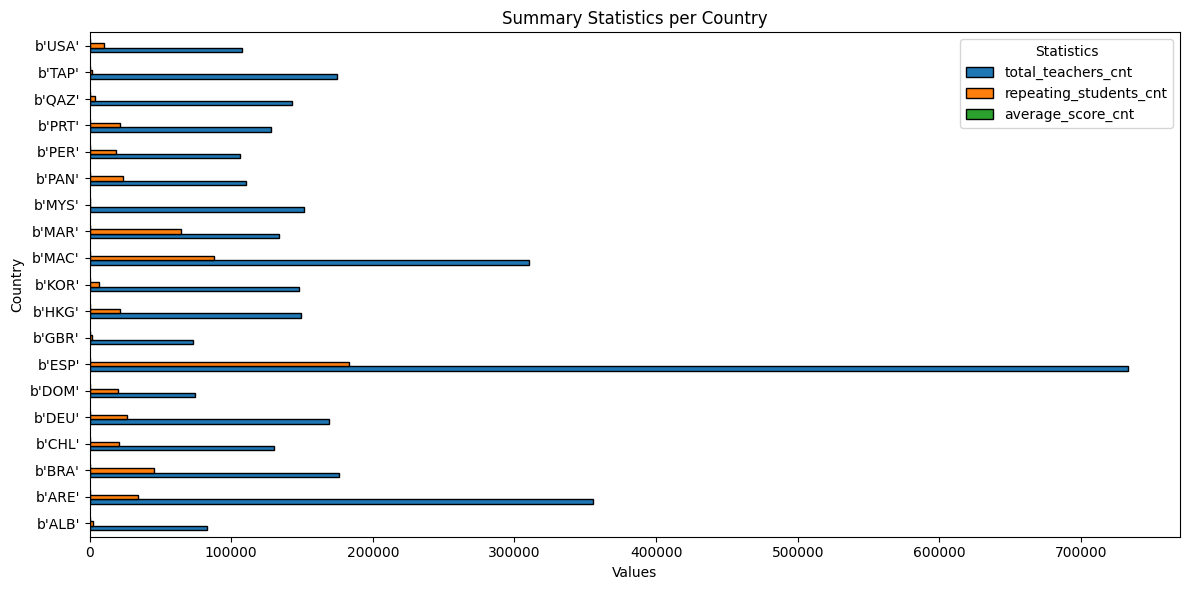

In [15]:
# Group by teacher (CNTTCHID) with students performance aggregated
summary = teacher.groupby('CNT').agg(
    total_teachers_cnt=('CNT', 'count'),
    repeating_students_cnt=('REPEAT', 'sum'),
    average_score_cnt=('average_score', 'mean')
).reset_index()

# Set country as index for plotting
summary.set_index('CNT')[['total_teachers_cnt', 'repeating_students_cnt', 'average_score_cnt']].plot(
    kind='barh',
    figsize=(12, 6),
    edgecolor='black'
)

# Add labels and title

plt.title("Summary Statistics per Country")
plt.xlabel("Values")
plt.ylabel("Country")
plt.legend(title="Statistics")
plt.tight_layout()
plt.show()


In [16]:
def categorize_reading_teacher_by_student_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total * 0.90)
    good_threshold = int(total * 0.70)
    sufficient_threshold = int(total * 0.50)

    # Assign categories from highest to lowest
    df.loc[0:sufficient_threshold-1, 'Reading Score Classification'] = 'Insufficient (0-49%)'
    df.loc[sufficient_threshold:good_threshold-1, 'Reading Score Classification'] = 'Sufficient (50-69%)'
    df.loc[good_threshold:very_good_threshold-1, 'Reading Score Classification'] = 'Good (70-89%)'
    df.loc[very_good_threshold:, 'Reading Score Classification'] = 'Very Good (90-100%)'

    return df

teacher = categorize_reading_teacher_by_student_performance(teacher)

print("Number of students by classification")
print("Very Good (90-100%): ", len(teacher[teacher['Reading Score Classification']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(teacher[teacher['Reading Score Classification']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(teacher[teacher['Reading Score Classification']=="Sufficient (50-69%)"]))
print("Insufficient (0-49%): ", len(teacher[teacher['Reading Score Classification']=="Insufficient (0-49%)"]))

Number of students by classification
Very Good (90-100%):  345667
Good (70-89%):  691334
Sufficient (50-69%):  691333
Insufficient (0-49%):  1728333


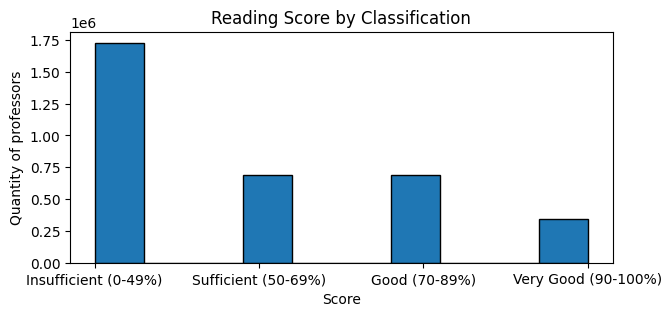

In [17]:
plt.figure(figsize=(7, 3))
plt.hist(teacher["Reading Score Classification"], edgecolor='black')
plt.title("Reading Score by Classification")
plt.ylabel("Quantity of professors")
plt.xlabel("Score")
plt.show()

In [18]:
correl = (
    teacher.corr(numeric_only=True)["average_score"]
    .abs()
    .sort_values(ascending=False)
)

In [19]:
top_corr = correl.drop(["average_score","highest_score","lowest_score","total_students","percentage_repeating","Avg Reading Result","CNTTCHID","CNTSTUID"]).head(30)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,OECD,0.336965,OECD country
1,TC199Q05HA,0.288316,"In your teaching, to what extent can you do: M..."
2,TC199Q02HA,0.268307,"In your teaching, to what extent can you do: H..."
3,SEFFINS,0.263866,Teacher's self-efficacy in instructional setti...
4,SEFFREL,0.262102,Teacher's self-efficacy in maintaining positiv...
5,TC192Q05HA,0.256331,How often in your lessons: I advise students o...
6,TC199Q03HA,0.238660,"In your teaching, to what extent can you do: C..."
7,FEEDBACK,0.237031,Feedback provided by the teachers (WLE)
8,TC199Q10HA,0.236392,"In your teaching, to what extent can you do: U..."
9,TC199Q01HA,0.229329,"In your teaching, to what extent can you do: G..."


In [20]:
correl = teacher[teacher['Reading Score Classification'] == "Very Good (90-100%)"].corr(numeric_only=True)['average_score'].sort_values(ascending=False)

top_corr = correl.drop(["average_score","highest_score","lowest_score","total_students","percentage_repeating","Avg Reading Result","CNTTCHID","CNTSTUID"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,OECD,0.538934,OECD country
1,TC176Q01HA,0.233840,How often involved in: Reading emails
2,TC204Q03HA,0.209032,"During the last 12 months, proportion of profe..."
3,W_FSTUWT_SCH_SUM,0.171106,Sum of W_FSTUWT
4,TC169Q03HA,0.155876,"This school year, how often used for teaching:..."
5,TC171Q01HA,0.144593,How often in your <test language lessons>: I s...
6,TC178Q02HA,0.130882,"In your lessons, do you include: Global health..."
7,TC171Q03HA,0.127710,How often in your <test language lessons>: At ...
8,TC203Q03HA,0.127671,Proportion of your teacher education dedicated...
9,TC168Q06HA,0.127427,"During the last month, asked students to use d..."


In [21]:
correl = teacher[teacher['Reading Score Classification'] == "Good (70-89%)"].corr(numeric_only=True)["average_score"].abs().sort_values(ascending=False)
top_corr = correl.drop(["average_score","highest_score","lowest_score","total_students","percentage_repeating","Avg Reading Result","CNTTCHID","CNTSTUID"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,OECD,0.517706,OECD country
1,SEFFREL,0.303871,Teacher's self-efficacy in maintaining positiv...
2,TC199Q05HA,0.286459,"In your teaching, to what extent can you do: M..."
3,TC199Q02HA,0.274194,"In your teaching, to what extent can you do: H..."
4,TC176Q01HA,0.244801,How often involved in: Reading emails
5,SEFFINS,0.240490,Teacher's self-efficacy in instructional setti...
6,TC150Q08HA,0.237552,"In your formal education and/or training, did ..."
7,TC182Q01HA,0.237291,Does your school have special programmes for: ...
8,TC199Q03HA,0.236091,"In your teaching, to what extent can you do: C..."
9,TC199Q01HA,0.234530,"In your teaching, to what extent can you do: G..."


In [22]:
correl = teacher[teacher['Reading Score Classification'] == "Sufficient (50-69%)"].corr(numeric_only=True)["average_score"].abs().sort_values(ascending=False)
top_corr = correl.drop(["average_score","highest_score","lowest_score","total_students","percentage_repeating","Avg Reading Result","CNTTCHID","CNTSTUID"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,OECD,0.397195,OECD country
1,TC199Q05HA,0.259918,"In your teaching, to what extent can you do: M..."
2,TC199Q02HA,0.245664,"In your teaching, to what extent can you do: H..."
3,SEFFREL,0.237190,Teacher's self-efficacy in maintaining positiv...
4,SEFFINS,0.225789,Teacher's self-efficacy in instructional setti...
5,TC199Q03HA,0.218333,"In your teaching, to what extent can you do: C..."
6,TC192Q05HA,0.215050,How often in your lessons: I advise students o...
7,Region,0.213793,Region
8,CNTSCHID,0.213791,Intl. School ID
9,CNTRYID,0.213770,Country Identifier


In [23]:
correl = teacher[teacher['Reading Score Classification'] == "Insufficient (0-49%)"].corr(numeric_only=True)["average_score"].abs().sort_values(ascending=False)
top_corr = correl.drop(["average_score","highest_score","lowest_score","total_students","percentage_repeating","Avg Reading Result","CNTTCHID","CNTSTUID"]).head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,TC202Q09HA,0.177325,How often in your <test language lessons>: I a...
1,TC182Q03HA,0.170638,Does your school have special programmes for: ...
2,ADAPTINSTR,0.169199,Student assessment/use (adaption of instructio...
3,SEFFINS,0.166901,Teacher's self-efficacy in instructional setti...
4,TC192Q05HA,0.166640,How often in your lessons: I advise students o...
5,TC163Q03HA,0.165961,How important do you consider teaching the fol...
6,TC199Q12HA,0.163195,"In your teaching, to what extent can you do: I..."
7,TC188Q01HA,0.159399,Studied in a country other than [country of test]
8,FEEDBINSTR,0.157669,Feedback provided by the teachers (WLE)
9,TC202Q05HA,0.157170,How often in your <test language lessons>: I t...


### Categorical Values analysis (verificar este passo!!!!!)

Regarding the categorical values, there are a few of them that are country specific. Since this study focuses on identifying global trends, we chose not to include these variables in our analysis.

Country specific codes:

- ST250D06JA
- ST250D07JA
- ST251D08JA
- ST251D09JA
- ST330D10WA
- PROGN

Additionally, the codes "CNT", "NatCen", "STRATUM" and "SUBNATION" are all related to the student's country/region. To reduce the dimensionality of the dataset, we decided to retain only "CNT", as it effectively aggregates the information from the others.

"COBN_S", "COBN_M" and "COBN_F" represent the country of birth of the student, mother and father, respectively. This were excluded to avoid increasing the dimensionality with features that are strongly correlated with "CNT".

"OCOD1", "OCOD2" and "OCOD3" represent the occupation of the student, mother and father. While potentially insightful, occupational data can be highly country-dependent due to cultural and economic differences. For this reason, we chose not to include them in the current analysis.

Finally, "VER_DAT" was removed, as it only contains the questionnaire date, which is not relevant to our study.


"CNT" (Country) is the only remaining categorical variable, but it contains a large number of distinct values, and it needs to be grouped into fewer categories to avoid high dimensionality in future approaches such as One-Hot Encoding.

## 2.4 Verify data quality

In this step we started by checking missing values in the dataset.

We've decided that variables with more than 70% missing data can lead to biased results, so they should be removed from the dataset in the future.


In [24]:
print("\n--- Missing Values ---")
missing = teacher.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.7])


--- Missing Values ---
TC150Q06HA    0.743933
TC204Q01HA    0.742789
TC204Q02HA    0.742319
TC203Q01HA    0.742066
TC203Q02HA    0.741960
                ...   
TC170Q01HA    0.728075
TCDIRINS      0.728040
FEEDBINSTR    0.727967
ADAPTINSTR    0.727936
TCDISCLIMA    0.727911
Length: 77, dtype: float64


We've also done a sanity check to see if there were any duplicated rows or columns, but there were no cases in this dataset.


In [25]:
print("\n--- Duplicated Rows ---")
print(f"Duplicated rows: {teacher.duplicated().sum()}")


--- Duplicated Rows ---
Duplicated rows: 0


In [ ]:
print("\n--- Duplicated Columns ---")
print(f"Duplicated columns: {teacher.T.duplicated().sum()}")


--- Duplicated Columns ---
